

```
Author ===> Yagnik Poshiya
GitHub ===> @yagnikposhiya
Charotar University Of Science and Technology, CSPIT,
Anand, Gujarat, India.
```



## **0. Libraries**

In [1]:
import cv2 # opencv version 4.1.2
import numpy as np # version 1.21.6
import pandas as pd # version 1.3.5
import matplotlib.pyplot as plt
from math import log10, sqrt
from google.colab.patches import cv2_imshow

## **1. Loading Data**

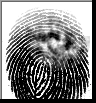

In [2]:
""" loading data from given path"""

input_image = cv2.imread('/content/drive/MyDrive/1__M_Left_index_finger_Obl.BMP') # SOCOFing Dataset
# input_image = cv2.imread('/content/drive/MyDrive/0310542_R1_3.bmp') LivDet 2015 Dataset
# input_image = cv2.imread('/content/drive/MyDrive/002_1_7.png') LivDet 2015 Dataset
# input_image = cv2.imread('/content/drive/MyDrive/004_3_6.bmp')

""" showing loaded image """
cv2_imshow(input_image)

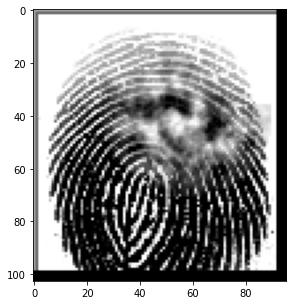

In [3]:
""" zoom in the loaded image """

plt.figure(figsize=(10,5)) 
plt.imshow(input_image)

## **00. Defining PSNR() For Image Quality Comparison**

In [4]:
""" 
    PSNR() function return value 
    which is used compare image quality.
"""

def PSNR(original_image, compressed_image): # PSNR: Peak Signal-to-Noise Ratio

  MSE = np.mean((original_image-compressed_image)**2)

  if MSE==0:
    """ 
        MSE=0 means both image are same 
        so quality will be equal.
    """
    return 100 

  else:
    max_pixel_value = 255.0
    psnr = 20*log10(max_pixel_value/sqrt(MSE))
    return psnr

## **2. Grayscale Conversion**

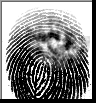

In [5]:
grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY) # converting image into grayscale

cv2_imshow(grayscale_image) # showing an image

## **3. Histogram Equalization**

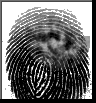

In [6]:
equalized_image = cv2.equalizeHist(grayscale_image) # histogram equalization using equalizeHist() method

cv2_imshow(equalized_image) # showing an image

## **4. Filtering Process Using 2D Kernel**

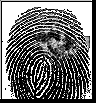

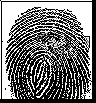

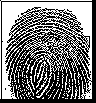

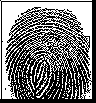

In [7]:
""" applying filtering process using convolutional 2D kernel """

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

image = [] # declaring empty image
image.append(equalized_image) # appending first equalizaed_image

for iterVar_One in range(4):
  sharped_image = cv2.filter2D(src=image[iterVar_One], ddepth=-1, kernel=kernel) # applying 2D filter
  image.append(sharped_image) # appending filtered image to image list
  cv2_imshow(image[len(image)-1]) # showing an image

sharped_image = image[len(image)-1] # assigning final image to sharped_image variable

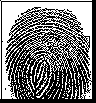

In [8]:
cv2_imshow(sharped_image) # showing an image 

## **5. Image Binarization**

### **Comparative Study**

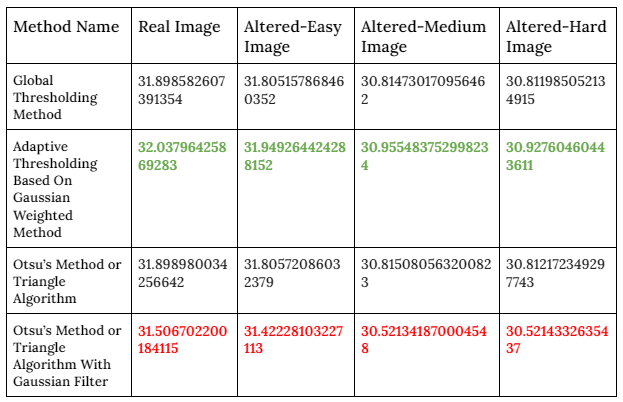

> PSNR value is directly **proportional to image quality.**

### **Implementation**

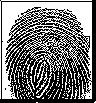

In [9]:
""" 
      In given table PSNR value is high for 
      adaptive thresholding based on gaussian weighted method.
      so selecting that method for binarization.
"""

"""
      Params:
        1. input image
        2. threshold value
        3. method names:
            a. cv.ADAPTIVE_THRESH_GAUSSIAN_C
            b. cv.ADAPTIVE_THRESH_MEAN_C
        4. binarization:  cv2.THRESH_BINARY
        5. Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
        6. Constant subtracted from the mean or weighted mean. Normally, it is positive but may be zero or negative as well.
"""
binary_image = cv2.adaptiveThreshold(sharped_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2) # binarization
cv2_imshow(binary_image) # showing an image

In [10]:
""" checking quality difference between sharped_image and binary_image """

quality_difference = PSNR(sharped_image, binary_image)
print(quality_difference)

53.50458270366652


In [11]:
""" checking quality difference between grayscale_image and binary_image """

quality_difference = PSNR(grayscale_image, binary_image)
print(quality_difference)

30.82837558993821


## **6. Image Thinning**

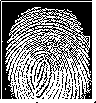

In [12]:
negative_binary_image = abs(255-binary_image) # generating negative image
cv2_imshow(negative_binary_image) # showing negative image

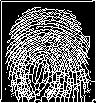

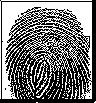

In [13]:
intermediate_thinned_image = cv2.ximgproc.thinning(negative_binary_image) # applying thinning to negative binary image

""" showing output image from thinning process of negative binary image """
cv2_imshow(intermediate_thinned_image)

cv2_imshow(binary_image) # showing binary image

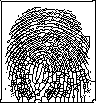

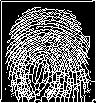

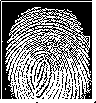

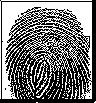

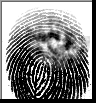

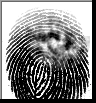

In [14]:
negative_thinned_image = abs(255-intermediate_thinned_image) # again applying negation method to thinned_image


"""
      negatation process of intermediate_thinned_image 
      produces final thinned image.
"""
thinned_image = negative_thinned_image # final thinned image


"""
      showing all images for comparison. or 
      to see all states of an input image in image processing.
"""
cv2_imshow(thinned_image) # showing final thinned_image
cv2_imshow(intermediate_thinned_image) # showing an intermediate thinned image
cv2_imshow(negative_binary_image) # showing negative binary image
cv2_imshow(binary_image) # showing binary image
cv2_imshow(grayscale_image) # showing grayscale image
cv2_imshow(input_image) # showing input image

## **7. Quality Comparisons**

In [15]:
""" finding PSNR value to compare image quality of sharped_image and thinned_image """

quality_diff_one = PSNR(sharped_image,thinned_image)
print(quality_diff_one)

51.86285857721421


In [16]:
""" finding PSNR value to compare image quality of binary_image and thinned_image """

quality_diff_two = PSNR(binary_image, thinned_image)
print(quality_diff_two)

56.765701542635256


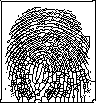

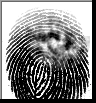

In [17]:
""" showing final output image and input image """

cv2_imshow(thinned_image) # final output image
cv2_imshow(input_image) # input image